In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import pprint

In [2]:
engine = sqlite3.connect('HW1_DB')
# TODO: re-load dataframes from SQL
airports_df = pd.read_sql('select * from airports_db', engine)
airlines_df = pd.read_sql('select * from airlines_db', engine)
routes_df = pd.read_sql('select * from routes_db', engine)
incidents_df = pd.read_sql('select * from incidents_db', engine)

In [3]:
engine.execute('DROP TABLE IF EXISTS flights')
aug_flights_df = pd.read_csv('http://big.dataanalytics.education/data/Flights-Aug-2016.csv')
sep_flights_df = pd.read_csv('http://big.dataanalytics.education/data/Flights-Sep-2016.csv')
oct_flights_df = pd.read_csv('http://big.dataanalytics.education/data/Flights-Oct-2016.csv')
aug_flights_df.to_sql('flights', engine, if_exists = 'append', index = False)
sep_flights_df.to_sql('flights', engine, if_exists = 'append', index = False)
oct_flights_df.to_sql('flights', engine, if_exists = 'append', index = False)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:1201: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)


In [4]:
df = pd.read_sql('SELECT COUNT(*) FROM flights', engine)
numRows = df.iloc[0][0]


In [5]:
pd.read_sql('SELECT * FROM routes_db wHERE stops>0 LIMIT 2', engine)

,airline,airline_id,source_airport,source_airport_id,dest_airport,dest_airport_id,codeshare,stops,equipment
0,5T,1623,YRT,132,YEK,50,,1,ATR
1,AC,330,ABJ,253,BRU,302,,1,333


## Step 6.1

In [6]:
#Output the value of the count in a Cell, as an integer.
numRows

1425851

## Step 6.2.1

In [7]:
q = 'SELECT airline, dest_airport, COUNT(*) as Count' + \
' FROM routes_db JOIN flights ' + \
'ON (airline=Carrier AND dest_airport=Dest AND source_airport=Origin) '+ \
'GROUP BY Carrier, dest_airport ORDER BY airline, dest_airport LIMIT 60'


IATA_flight_count = pd.read_sql(q, engine)
IATA_flight_count

,airline,dest_airport,Count
0,AA,ABQ,446
1,AA,ALB,255
2,AA,AMA,70
3,AA,ANC,44
4,AA,ATL,2832
5,AA,AUS,2265
6,AA,BDL,1015
7,AA,BNA,1418
8,AA,BOI,187
9,AA,BOS,7194


## Step 6.2.2

In [8]:
q2 = 'SELECT airline, dest_airport, COUNT(*) as number_of_bad_flights' + \
' FROM routes_db JOIN flights ' + \
'ON (airline=Carrier AND dest_airport=Dest AND source_airport=Origin) '+ \
'WHERE (Cancelled=1.0 OR ArrDelayMinutes>=30)' + \
'GROUP BY Carrier, dest_airport ORDER BY airline, dest_airport LIMIT 60'


IATA_bad = pd.read_sql(q2, engine)
IATA_bad.set_index(['airline', 'dest_airport'], inplace=True)
IATA_bad

number_of_bad_flights
airline dest_airport                       
AA      ABQ                              67
        ALB                              15
        AMA                               9
        ANC                               2
        ATL                             297
        AUS                             292
        BDL                             134
        BNA                             139
        BOI                              15
        BOS                            1115
        BTV                               1
        BUF                              29
        BWI                             183
        CHS                              16
        CLE                              71
        CLT                            1951
        CMH                              71
        COS                              49
        DAY                              13
        DCA                             996
        DEN                             356
        DFW                            4114
        DSM                              38
        DTW                             166
        ELP                              49
        EWR                             422
        FAT                              23
        FLL                             239
        GEG                              16
        GSO                               3
        HNL                             111
        HOU                               9
        IAD                              92
        IAH                             296
        ICT                              16
        ILM                              18
        IND                              96
        JAX                             123
        JFK                             758
        KOA                              18
        LAS                             504
        LAX                            1441
        LBB                               7
        LGA                            1103
        LIH                              17
        MCI                             177
        MCO                             745
        MDT                              10
        MEM                              92
        MFE                              41
        MIA                            1879
        MKE                              58
        MSP                             292
        MSY                             179
        OAK                              29
        OGG                              75
        OKC                              49
        OMA                              39
        ONT                              74
        ORD                            2337

## Step 6.2.3

In [9]:
q3 = 'SELECT airline, dest_airport, COUNT(*) as number_of_bad_flights' + \
' FROM routes_db JOIN flights ' + \
'ON (airline=Carrier AND dest_airport=Dest AND source_airport=Origin) '+ \
'WHERE (Cancelled=1.0 OR ArrDelayMinutes>=30)' + \
'GROUP BY Carrier, dest_airport HAVING (count(*) >= 1000) ' + \
'ORDER BY airline, dest_airport LIMIT 60'


IATA_bad_having = pd.read_sql(q3, engine)
IATA_bad_having.set_index(['airline', 'dest_airport'], inplace=True)

In [10]:
IATA_bad_having

number_of_bad_flights
airline dest_airport                       
AA      BOS                            1115
        CLT                            1951
        DFW                            4114
        LAX                            1441
        LGA                            1103
        MIA                            1879
        ORD                            2337
        PHL                            1208
        PHX                            1464
B6      BOS                            1774
        JFK                            1643
DL      ATL                            4539
        DTW                            1001
        LAX                            1007
        MSP                            1409
F9      DEN                            1032
UA      DEN                            1004
        EWR                            1920
        IAH                            1201
        LAX                            1338
        ORD                            2641
        SFO                            2473
WN      BWI                            1195
        DEN                            1196
        HOU                            1013
        LAS                            1506
        LAX                            1678
        MDW                            1259
        PHX                            1637

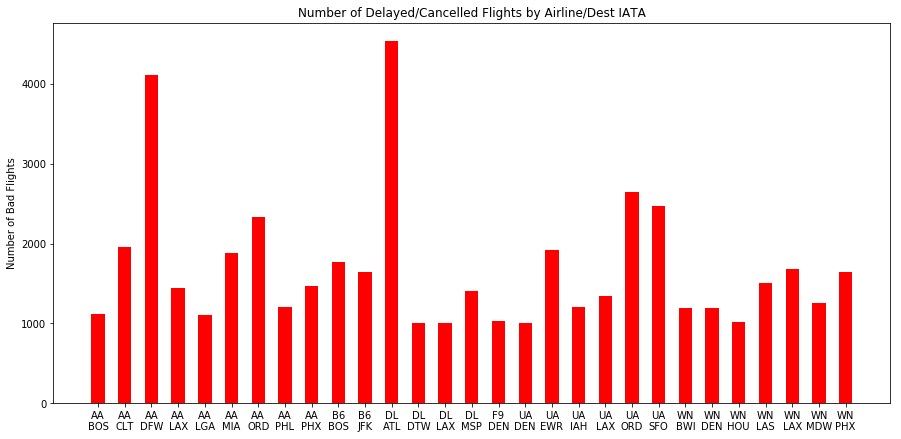

In [11]:
plt.figure(figsize=(15, 7))
x = list(np.arange(1,IATA_bad_having.shape[0]+1))
labels = [(row[0] + "\n" + row[1]) for row in IATA_bad_having.index]
vals = list(IATA_bad_having['number_of_bad_flights'])
plt.bar(x, vals, tick_label=labels, width = .5, color='red')
plt.ylabel('Number of Bad Flights')
plt.title('Number of Delayed/Cancelled Flights by Airline/Dest IATA');


In [21]:
engine.execute('DROP TABLE IF EXISTS shortest')
engine.execute(('CREATE TABLE shortest as SELECT source_airport, dest_airport, Year, Month, DayOfMonth, \
                DepTime, ArrTime, min(ArrTime) AS earliest_arrival \
                FROM routes_db JOIN flights \
                ON (airline=Carrier AND dest_airport=Dest AND source_airport=Origin) \
                WHERE (Month==9 AND DayOfMonth<=8 AND DepTime < ArrTime) \
                GROUP BY source_airport, dest_airport, DayOfMonth, DepTime'))


In [22]:
engine.execute('DROP INDEX IF EXISTS my_index')
engine.execute('CREATE index my_index ON shortest(Year,Month,DayOfMonth,source_airport,dest_airport)')

## Step 6.3.1

In [24]:
pd.read_sql("SELECT * \
             FROM shortest as s1 JOIN shortest as s2 \
             ON (s1.dest_airport=s2.source_airport AND s1.DayOfMonth=s2.DayOfMonth) \
             WHERE (s1.source_airport LIKE 'LAX' AND s2.dest_airport LIKE 'DEN' AND s1.ArrTime + 100 <= s2.DepTime) \
             AND EXISTS (SELECT * FROM shortest as s3 \
                         WHERE s3.source_airport LIKE 'LAX' AND s3.dest_airport LIKE 'DEN' AND \
                         s3.DepTime = s1.DepTime AND s3.arrTime > s2.arrTime)", engine)


,source_airport,dest_airport,Year,Month,DayOfMonth,DepTime,ArrTime,earliest_arrival,source_airport,dest_airport,Year,Month,DayOfMonth,DepTime,ArrTime,earliest_arrival
